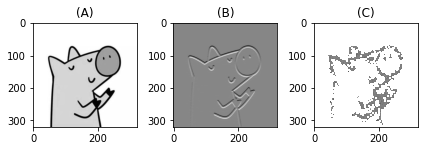

In [9]:

#Sobel边缘检测
import cv2
from matplotlib import pyplot as plt 
import numpy as np

img=cv2.imread("..\data\smallpig.jpeg")
gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Sobel边缘检测边缘检测
sobel = cv2.Sobel(gray_img,cv2.CV_64F,0,1)
sobel1 = cv2.Sobel(gray_img,cv2.CV_64F,1,1)
sobel2 = cv2.Sobel(gray_img,cv2.CV_64F,1,0)

#对二值图像进行反转  黑白颠倒
notsobel=cv2.bitwise_not(sobel)

plt.subplot(131)
plt.imshow(gray_img,cmap=plt.cm.gray) 
plt.title("(A)")

plt.subplot(132)
plt.imshow(sobel,cmap=plt.cm.gray) 
plt.title("(B)")

plt.subplot(133)
plt.imshow(notsobel,cmap=plt.cm.gray) 
plt.title("(C)")
plt.tight_layout()



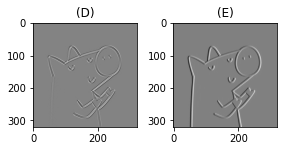

In [10]:
plt.subplot(131)
plt.imshow(sobel1,cmap=plt.cm.gray) 
plt.title("(D)")

plt.subplot(132)
plt.imshow(sobel2,cmap=plt.cm.gray) 
plt.title("(E)")
plt.tight_layout()

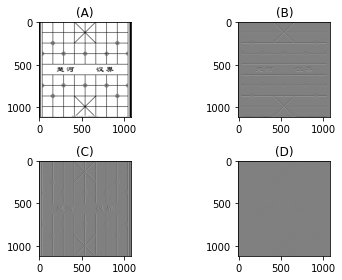

In [11]:

#Sobel边缘检测 区分不同方向

img=cv2.imread("../data/sobel.jpeg")
gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Sobel边缘检测边缘检测
sobel01 = cv2.Sobel(gray_img,cv2.CV_64F,0,1)
#对二值图像进行反转  黑白颠倒
# sobel01=cv2.bitwise_not(sobel01)


#Sobel边缘检测边缘检测
sobel10 = cv2.Sobel(gray_img,cv2.CV_64F,1,0)
#对二值图像进行反转  黑白颠倒
# sobel10=cv2.bitwise_not(sobel10)

#Sobel边缘检测边缘检测
sobel11 = cv2.Sobel(gray_img,cv2.CV_64F,1,1)
#对二值图像进行反转  黑白颠倒
# sobel11=cv2.bitwise_not(sobel11)


plt.subplot(221)
plt.imshow(gray_img,cmap=plt.cm.gray) 
plt.title("(A)")

plt.subplot(222)
plt.imshow(sobel01,cmap=plt.cm.gray) 
plt.title("(B)")

plt.subplot(223)
plt.imshow(sobel10,cmap=plt.cm.gray) 
plt.title("(C)")

plt.subplot(224)
plt.imshow(sobel11,cmap=plt.cm.gray) 
plt.title("(D)")

plt.tight_layout()

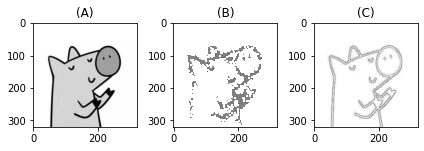

In [12]:
#拉普拉斯边缘检测

img=cv2.imread("../data/smallpig.jpeg")
gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#拉普拉斯边缘检测
lap = cv2.Laplacian(gray_img,cv2.CV_64F)#拉普拉斯边缘检测
lap = np.uint8(np.absolute(lap))##对lap去绝对值

#对二值图像进行反转  黑白颠倒
lap=cv2.bitwise_not(lap)

#Sobel边缘检测边缘检测
sobel = cv2.Sobel(gray_img,cv2.CV_64F,0,1)
#对二值图像进行反转  黑白颠倒
sobel=cv2.bitwise_not(sobel)


plt.subplot(131)
plt.imshow(gray_img,cmap=plt.cm.gray) 
plt.title("(A)")

plt.subplot(132)
plt.imshow(sobel,cmap=plt.cm.gray) 
plt.title("(B)")

plt.subplot(133)
plt.imshow(lap,cmap=plt.cm.gray) 
plt.title("(C)")

plt.tight_layout()

Canny边缘检测算法可以分为以下5个步骤：
1）使用高斯滤波器，以平滑图像，滤除噪声。
2）计算图像中每个像素点的梯度强度和方向。
3）应用非极大值抑制，以消除边缘检测带来的杂散响应。
4）应用双阈值检测来确定真实的和潜在的边缘。
5）通过抑制孤立的弱边缘最终完成边缘检测。

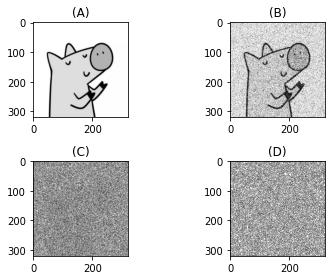

In [32]:

import skimage

img=cv2.imread("../data/smallpig.jpeg")
img=cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

#添加高斯噪声
noise_img=skimage.util.random_noise(img.copy(), mode="gaussian",  seed=None, clip=True,mean=0,var=0.16)
noise_img=np.uint8(noise_img*255)

#拉普拉斯边缘检测
lap = cv2.Laplacian(noise_img,cv2.CV_64F)#拉普拉斯边缘检测
lap = np.uint8(np.absolute(lap))##对lap去绝对值
#对二值图像进行反转  黑白颠倒
lap=cv2.bitwise_not(lap)


#Canny边缘检测边缘检测
canny = cv2.Canny(noise_img,150,300)
#对二值图像进行反转  黑白颠倒
canny=cv2.bitwise_not(canny)

plt.subplot(221)
plt.imshow(img,cmap=plt.cm.gray) 
plt.title("(A)")

plt.subplot(222)
plt.imshow(noise_img,cmap=plt.cm.gray) 
plt.title("(B)")

plt.subplot(223)
plt.imshow(lap,cmap=plt.cm.gray) 
plt.title("(C)")

plt.subplot(224)
plt.imshow(canny,cmap=plt.cm.gray) 
plt.title("(D)")

plt.tight_layout()

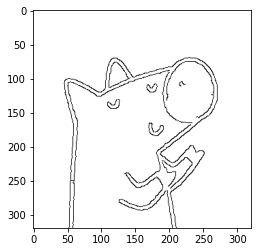

In [36]:
#先做高斯平滑进行降噪
canny = cv2.GaussianBlur(noise_img,(9,9),0)
# 进行canny边缘检测
canny = cv2.Canny(canny,150,300)
canny = cv2.bitwise_not(canny)
plt.imshow(canny,cmap=plt.cm.gray)
